In [94]:
%matplotlib inline
from bs4 import BeautifulSoup
import urllib.request
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
vocab=pd.read_csv('gre_unfamiliar.csv',encoding='utf-8')

In [129]:
vocab.to_csv('gre_unfamiliar.csv',encoding='utf-8',index=False)

In [5]:
def add_new_col(df,name,default_val=np.NaN):
    df.loc[:, name] = default_val

In [6]:
def drop_unnamed_col(df):
    df.loc[:, ~df.columns.str.contains('^Unnamed')]
    return df

## Jul 23

In [61]:
vocab=vocab.head(10)

In [3]:
vocab

,vocabulary,chinese,meaning,example,short,long,definition
0,cosmopolitan,指人因见多识广而到哪里都悠然自得的,familiar with and at ease in many different co...,"his knowledge of French, Italian, and Spanish ...","Your Aunt Eleanor, who's lived in six differen...",People who are cosmopolitan have an air of gla...,1. composed of people from or at home in many ...
1,clamorous,NaN,making a loud and confused noise,NaN,Clamorousmeans super loud and obnoxiously cryi...,"Clamorouscomes from the Latin rootclÄmĹr, me...",1. conspicuously and offensively loud; given t...
2,intransigent,指人固执己见的,characterized by refusal to compromise or to a...,NaN,"Intransigentmeans inflexible, stubborn, entren...",Transhas to do with movement â thinktranspor...,"1. impervious to pleas, persuasion, requests, ..."
3,numinous,神圣的,NaN,"the strange, numinous beauty of this ancient l...",Somethingnuminoushas a strong religious qualit...,"Numinouscomes from the Latinnumin-meaning ""div...",1. of or relating to or characteristic of a nu...
4,sterling,(某人的努力成果/人格)优秀的,"(of a person or their work, efforts, or qualit...",this organization does sterling work for young...,"Sterlingis British money, but it also describe...","Sterling is a word for British currency, and a...",1. highest in quality\n2. British money; espec...
5,ad hoc,特别的/临时形成针对…的,"formed, arranged, or done for a particular pur...",an ad hoc committee (亚人委员会),NaN,NaN,NaN
6,enigma,指人/事物：神秘的，困惑的，难以理解的,"a person or thing that is mysterious, puzzling...",NaN,Use the nounenigmato refer to something that i...,Traveling to English from Greek by means of th...,1. something that baffles understanding and ca...
7,neutralized,使之无效/使不能正常运作,render (something) ineffective or harmless by ...,impatience at his frailty began to neutralize ...,NaN,NaN,1. made neutral in some respect; deprived of d...
8,fickle,善变的(贬义，指兴趣/忠诚变化无端),NaN,"Web patrons are a notoriously fickle lot, boun...",People who areficklechange their minds so much...,"Ficklecomes from the Old English wordficol, fo...",1. liable to sudden unpredictable change\n2. m...
9,partiality,偏袒(某人或某事),unfair bias in favor of one thing or person co...,an attack on the partiality of judges,Partialityis the habit of favoring something —...,Partialityis like bias. It means that your fav...,1. an inclination to favor one group or view o...


In [9]:
vocab=drop_unnamed_col(vocab)

In [10]:
vocabList = vocab['vocabulary'].tolist()

In [11]:
baseurl='https://www.vocabulary.com/dictionary/'

In [12]:
EMPTY_CELL = 'missing'

In [65]:
vocab.drop('short',axis=1)
vocab.drop('long',axis=1)
vocab.drop('definition',axis=1)
add_new_col(vocab,'short','')
add_new_col(vocab,'long','')
add_new_col(vocab,'definition','')

## Test section

In [14]:
vocab = vocab.head(10)

In [44]:
vocab

,vocabulary,chinese,meaning,example,short,long,definition
0,cosmopolitan,指人因见多识广而到哪里都悠然自得的,familiar with and at ease in many different co...,"his knowledge of French, Italian, and Spanish ...","Your Aunt Eleanor, who's lived in six differen...",People who are cosmopolitan have an air of gla...,1. composed of people from or at home in many ...
1,clamorous,NaN,making a loud and confused noise,NaN,Clamorousmeans super loud and obnoxiously cryi...,"Clamorouscomes from the Latin rootclÄmĹr, me...",1. conspicuously and offensively loud; given t...
2,intransigent,指人固执己见的,characterized by refusal to compromise or to a...,NaN,"Intransigentmeans inflexible, stubborn, entren...",Transhas to do with movement â thinktranspor...,"1. impervious to pleas, persuasion, requests, ..."
3,numinous,神圣的,NaN,"the strange, numinous beauty of this ancient l...",Somethingnuminoushas a strong religious qualit...,"Numinouscomes from the Latinnumin-meaning ""div...",1. of or relating to or characteristic of a nu...
4,sterling,(某人的努力成果/人格)优秀的,"(of a person or their work, efforts, or qualit...",this organization does sterling work for young...,"Sterlingis British money, but it also describe...","Sterling is a word for British currency, and a...",1. highest in quality\n2. British money; espec...
5,ad hoc,特别的/临时形成针对…的,"formed, arranged, or done for a particular pur...",an ad hoc committee (亚人委员会),,,
6,enigma,指人/事物：神秘的，困惑的，难以理解的,"a person or thing that is mysterious, puzzling...",NaN,Use the nounenigmato refer to something that i...,Traveling to English from Greek by means of th...,1. something that baffles understanding and ca...
7,neutralized,使之无效/使不能正常运作,render (something) ineffective or harmless by ...,impatience at his frailty began to neutralize ...,,,1. made neutral in some respect; deprived of d...
8,fickle,善变的(贬义，指兴趣/忠诚变化无端),NaN,"Web patrons are a notoriously fickle lot, boun...",People who areficklechange their minds so much...,"Ficklecomes from the Old English wordficol, fo...",1. liable to sudden unpredictable change\n2. m...
9,partiality,偏袒(某人或某事),unfair bias in favor of one thing or person co...,an attack on the partiality of judges,Partialityis the habit of favoring something —...,Partialityis like bias. It means that your fav...,1. an inclination to favor one group or view o...


In [66]:
print(vocab.columns)
print(vocab.columns[6])

Index(['vocabulary', 'chinese', 'meaning', 'example', 'short', 'long',
       'definition'],
      dtype='object')
definition


In [122]:
restart_index=955

In [124]:

for index, entry in vocab.iterrows():
    
    if index < restart_index:
        continue
        
    restart_index = index
    
    # get the entry's word
    word = entry['vocabulary']
    
    # print record
    print("index " + str(index) + " | word: " + word)
    
    try:
        # Fetch HTML document and instantiate soup
        with urllib.request.urlopen(baseurl + word) as url:
            r=url.read()
    except Exception:
        continue
        
    soup = BeautifulSoup(r,'html.parser')

    # check if the word exists in vocabulary.com
    if len(soup.select('h1.dynamictext')) == 0: 
        continue
        
    # get contents we want
    shortContent = soup.select('p.short')
    longContent = soup.select('p.long')
    defContent = soup.select('h3.definition')
    
    word = soup.select('h1.dynamictext')

    # check if the word explanation exists
    if len(shortContent) > 0 and len(longContent)>0 :
        vocab.set_value(index,'short',shortContent[0].get_text(strip=True))
        vocab.set_value(index,'long',longContent[0].get_text(strip=True))
    
    contentStr=''
    for i in range(len(defContent)):
        # remove the <a> tag in definition
        defContent[i].a.extract()
        # the serial number of definition starts at 1 rather than 0
        contentStr += str(i+1) + '. ' + defContent[i].get_text(strip=True)+'\n'
    
    vocab.set_value(index,'definition',contentStr)
    
print('====================Finished=======================')

====================Finished=======================


In [103]:
print(vocab['definition'][685])

1. unproductive of success



In [110]:
restart_index

859

In [127]:
vocab.shape

(955, 7)

## Jul 27

In [76]:
original = pd.read_csv('gre词表.csv')

In [44]:
original = original.to_csv('gre词表.csv',encoding='utf-8',index=False)

In [77]:
original.sample(10)

,section,题号,单词,音标,释义
1352,S25,Q3,anthropogenic,[ˌænθrəpəˈdʒɛnɪk],"人为的，人类起源的 of, relating to, or resulting from t..."
1586,S31,Q10,gloomy,[ˈɡlumi],1. 沮丧的，忧伤的 sad or depressed
915,S16,Q4,testimony,[ˈtɛstəˈmoni],证据 proof or evidence that something exists or ...
3057,NaN,NaN,NaN,NaN,"2. 有创造力的 creative, original"
2033,NaN,NaN,NaN,NaN,authoritative，conclusive
4063,NaN,NaN,NaN,NaN,something in unjust or unfair.
3527,S69,Q2,pragmatic,[prægˈmætɪk],务实的 dealing with the problems that exist in a ...
480,S7,Q5,acrimonious,[ˌækrɪˈmoʊniəs],"尖刻的，辛辣的 caustic, biting, or rancorous especial..."
626,NaN,NaN,NaN,NaN,external agency or intervention
3457,S67,Q1,esoteric,[ˌesəˈterɪk],"深奥的,只有内行才懂的 known and understood by only a fe..."


In [38]:
original.columns

Index(['序号', 'section', '题号', '单词', '音标', '释义', 'Unnamed: 6', 'Unnamed: 7'], dtype='object')

In [42]:
original=original.drop('序号',axis=1)

In [48]:
original['单词'].value_counts()[:10]

obscure            12
ephemeral          11
capricious         11
subtle             10
diminish            9
inconsequential     9
circumvent          9
elusive             9
implausible         9
mundane             9
Name: 单词, dtype: int64

In [49]:
original.assign(char_count=0)

,section,题号,单词,音标,释义,char_count
0,S1,Q1,paradox,['pærədɑks],1. 自相矛盾 (的情况) You describe a situation as a p...,0
1,NaN,NaN,NaN,NaN,facts or qualities that seem to contradict eac...,0
2,NaN,NaN,NaN,NaN,2. 悖论，似非而是的说法 a statement that seems impossib...,0
3,NaN,NaN,NaN,NaN,opposing ideas that are both true,0
4,S1,Q1,cosmopolitan,['kɑzmə'pɑlətn],"1. (人等）见多识广的,a cosmopolitan person, belief, op...",0
5,NaN,NaN,NaN,NaN,different people and places,0
6,NaN,NaN,NaN,NaN,2（指地方）世界性的，国际性的（含褒义）a cosmopolitan place has p...,0
7,NaN,NaN,NaN,NaN,parts of the world - use this to show approval,0
8,S1,Q1,capricious,[kə'prɪʃəs],反复无常的; 易变的 changing often and quickly : impuls...,0
9,S1,Q1,insular,['ɪnsəlɚ],孤立的；与世隔绝的 separated from other people or cultu...,0


In [78]:
words=original['单词'].dropna()

In [80]:
words.value_counts()[:10]

obscure            12
ephemeral          11
capricious         11
subtle             10
diminish            9
inconsequential     9
circumvent          9
elusive             9
implausible         9
mundane             9
Name: 单词, dtype: int64

In [81]:
d = {'word':words.value_counts().index,'counts':words.value_counts()}

In [82]:
df = pd.DataFrame(data=d)

In [83]:
df.head(10)

,counts,word
obscure,12,obscure
ephemeral,11,ephemeral
capricious,11,capricious
subtle,10,subtle
diminish,9,diminish
inconsequential,9,inconsequential
circumvent,9,circumvent
elusive,9,elusive
implausible,9,implausible
mundane,9,mundane


In [69]:
df.shape

(2064, 2)

In [84]:
df.reset_index(drop=True,inplace=True)

In [85]:
df.head(10)

,counts,word
0,12,obscure
1,11,ephemeral
2,11,capricious
3,10,subtle
4,9,diminish
5,9,inconsequential
6,9,circumvent
7,9,elusive
8,9,implausible
9,9,mundane


In [88]:
df.assign(char_count=0)

,counts,word,char_count
0,12,obscure,0
1,11,ephemeral,0
2,11,capricious,0
3,10,subtle,0
4,9,diminish,0
5,9,inconsequential,0
6,9,circumvent,0
7,9,elusive,0
8,9,implausible,0
9,9,mundane,0


In [90]:
for idx,row in df.iterrows():
    df.set_value(idx,'char_count',len(row['word']))

In [91]:
df.head(10)

,counts,word,char_count
0,12,obscure,7.0
1,11,ephemeral,9.0
2,11,capricious,10.0
3,10,subtle,6.0
4,9,diminish,8.0
5,9,inconsequential,15.0
6,9,circumvent,10.0
7,9,elusive,7.0
8,9,implausible,11.0
9,9,mundane,7.0


In [92]:
df.to_csv('df.csv',index=False)

In [97]:
cts2 = df['counts'].value_counts()

In [103]:
cts2.tolist()

[1302, 460, 138, 79, 34, 22, 11, 7, 7, 2, 1, 1]

In [99]:
cts2.index.values

array([ 1,  2,  3,  4,  5,  6,  8,  9,  7, 11, 12, 10])

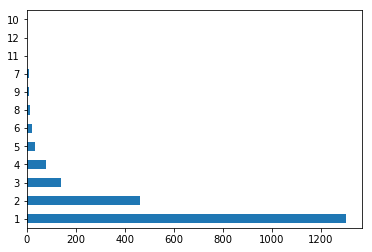

In [115]:
cts2.plot(kind='barh')